
# Curve Fitting with Bayesian Ridge Regression

Computes a Bayesian Ridge Regression of Sinusoids.

See `bayesian_ridge_regression` for more information on the regressor.

In general, when fitting a curve with a polynomial by Bayesian ridge
regression, the selection of initial values of
the regularization parameters (alpha, lambda) may be important.
This is because the regularization parameters are determined by an iterative
procedure that depends on initial values.

In this example, the sinusoid is approximated by a polynomial using different
pairs of initial values.

When starting from the default values (alpha_init = 1.90, lambda_init = 1.),
the bias of the resulting curve is large, and the variance is small.
So, lambda_init should be relatively small (1.e-3) so as to reduce the bias.

Also, by evaluating log marginal likelihood (L) of
these models, we can determine which one is better.
It can be concluded that the model with larger L is more likely.


### Bayesian Ridge Regression

#### Concept

Bayesian Ridge Regression is a linear regression model that estimates the coefficients using a probabilistic approach. It incorporates Bayesian inference, which allows for the incorporation of prior knowledge and provides a measure of uncertainty in the predictions. This regression technique applies a Gaussian prior to the regression coefficients and a Gamma prior to the precision of the noise.

#### Mathematical Background

Given a dataset $\ \{X, y\} $:

- $\ X \in \mathbb{R}^{n \times p} $ is the design matrix with $\ n $ samples and $\ p $ features.
- $\ y \in \mathbb{R}^{n} $ is the target vector.

The model is defined as:

$\
y = X \beta + \epsilon
$

where:
- $\ \beta \in \mathbb{R}^{p} $ is the vector of weights.
- $\ \epsilon \sim \mathcal{N}(0, \alpha^{-1} I) $ is the noise term with precision $\ \alpha $.

Each weight $\ \beta_j $ is assumed to be Gaussian-distributed:

$\
\beta_j \sim \mathcal{N}(0, \lambda^{-1})
$

where $\ \lambda $ is the precision of the distribution of $\ \beta_j $.

The hyperparameters $\ \alpha $ (precision of the noise) and $\ \lambda $ (precision of the weights) are estimated using Gamma distributions:

$\
\alpha \sim \text{Gamma}(\alpha_1, \alpha_2)
$
$\
\lambda \sim \text{Gamma}(\lambda_1, \lambda_2)
$

#### Logical Explanation

1. **Initialization**: Initialize the weights $\ \beta $ and the hyperparameters $\ \alpha $ and $\ \lambda $.

2. **Iterative Updates**:
   - Update the weights $\ \beta $ based on the current estimates of $\ \alpha $ and $\ \lambda $.
   - Update $\ \alpha $ based on the residuals of the model.
   - Update $\ \lambda $ based on the current estimates of the weights.

3. **Convergence**: Repeat the updates until the change in the weights $\ \beta $ is smaller than a predefined threshold (tol) or the maximum number of iterations (max_iter) is reached.

#### Advantages

- **Probabilistic Interpretation**: Provides a probabilistic framework, allowing for the incorporation of prior knowledge and the estimation of uncertainty.
- **Regularization**: Imposes a regularization that can prevent overfitting, especially in high-dimensional spaces.
- **Closed-form Solution**: For fixed $\ \alpha $ and $\ \lambda $, the model has a closed-form solution, which makes it computationally efficient.

#### Disadvantages

- **Hyperparameter Sensitivity**: The performance of the model can be sensitive to the choice of hyperparameters.
- **Computational Complexity**: The iterative procedure for updating $\ \alpha $ and $\ \lambda $ can be computationally intensive for large datasets.

#### Main Arguments

- **max_iter**: Maximum number of iterations. If `None`, defaults to 300.
- **tol**: Tolerance for convergence.
- **alpha_1**: Shape parameter for the Gamma distribution prior over $\ \alpha $.
- **alpha_2**: Inverse scale parameter for the Gamma distribution prior over $\ \alpha $.
- **lambda_1**: Shape parameter for the Gamma distribution prior over $\ \lambda $.
- **lambda_2**: Inverse scale parameter for the Gamma distribution prior over $\ \lambda $.
- **compute_score**: If True, compute the objective function at each step.
- **fit_intercept**: Whether to calculate the intercept for the model.
- **copy_X**: If True, X will be


In [ ]:
# Author: Yoshihiro Uchida <nimbus1after2a1sun7shower@gmail.com>

## Generate sinusoidal data with noise



In [83]:
import numpy as np


def func(x):
    return np.sin(2 * np.pi * x**2)


size = 100
rng = np.random.RandomState(1234)
x_train = rng.uniform(0.0, 1.0, size)
y_train = func(x_train) + rng.normal(scale=0.3, size=size)
x_test = np.linspace(0.0, 1.0, 100)
y_test = func(x_test) + rng.normal(scale=0.3, size=100)

## Fit by cubic polynomial



In [84]:
from sklearn.linear_model import BayesianRidge

n_order = 5
X_train = np.vander(x_train, n_order + 1, increasing=True)
X_test = np.vander(x_test, n_order + 1, increasing=True)
reg = BayesianRidge(n_iter = 500 ,tol=1e-8, fit_intercept=False, compute_score=True)

## Plot the true and predicted curves with log marginal likelihood (L)



c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


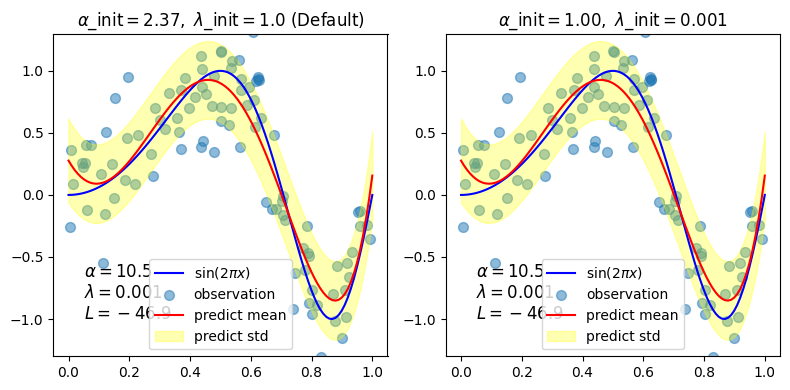

In [85]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
for i, ax in enumerate(axes):
    # Bayesian ridge regression with different initial value pairs
    if i == 0:
        init = [1 / np.var(y_train), 1.0]  # Default values
    elif i == 1:
        init = [1.0, 1e-3]
        reg.set_params(alpha_init=init[0], lambda_init=init[1])
    reg.fit(X_train, y_train)
    ymean, ystd = reg.predict(X_test, return_std=True)

    ax.plot(x_test, func(x_test), color="blue", label="sin($2\\pi x$)")
    ax.scatter(x_train, y_train, s=50, alpha=0.5, label="observation")
    ax.plot(x_test, ymean, color="red", label="predict mean")
    ax.fill_between(
        x_test, ymean - ystd, ymean + ystd, color="yellow", alpha=0.3, label="predict std"
    )
    ax.set_ylim(-1.3, 1.3)
    ax.legend()
    title = "$\\alpha$_init$={:.2f},\\ \\lambda$_init$={}$".format(init[0], init[1])
    if i == 0:
        title += " (Default)"
    ax.set_title(title, fontsize=12)
    text = "$\\alpha={:.1f}$\n$\\lambda={:.3f}$\n$L={:.1f}$".format(
        reg.alpha_, reg.lambda_, reg.scores_[-1]
    )
    ax.text(0.05, -1.0, text, fontsize=12)

plt.tight_layout()
# plt.show()

In [86]:
reg.score(X_test, y_test), reg.score(X_train, y_train)

(0.8081957764419796, 0.7858977927507267)

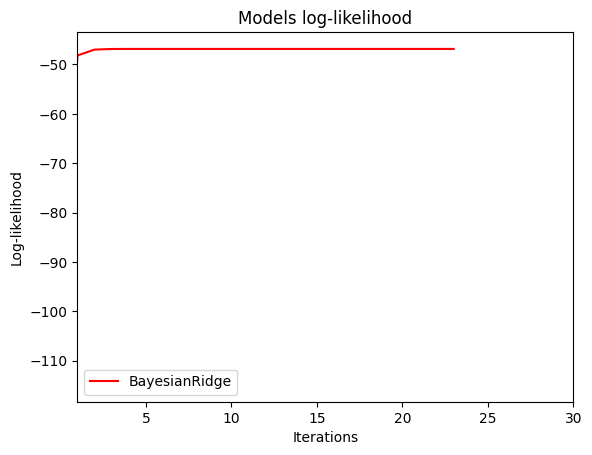

In [87]:
import numpy as np
plt.plot(reg.scores_, color="red", label="BayesianRidge")
plt.ylabel("Log-likelihood")
plt.xlabel("Iterations")
plt.xlim(1, 30)
plt.legend()
_ = plt.title("Models log-likelihood")